In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [52]:
import os
os.getcwd()
os.chdir(r'/Users/siwoolchoi/Desktop/siwooly/대학원/머신러닝/class/5주차 강의코드데이터-20260124')

lemon = pd.read_csv('lemon.csv', encoding='euc-kr', index_col='ID')
 
lemon.head()

,lemon,구매일자,판매처,연식,차량연령,제조사,모델명,트림,세부모델명,색상,...,현재평균상태소매가격,현재평균이상상태소매가격,프리미엄여부,차량보증,구매자ID,구매지우편번호,구매주,취득비용,온라인판매여부,보증금액
ID,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [53]:
lemon['lemon'].value_counts(normalize=True)

lemon
0    0.877012
1    0.122988
Name: proportion, dtype: float64

## 특정 카테고리별 lemon 평균 

In [54]:
lemon.columns

Index(['lemon', '구매일자', '판매처', '연식', '차량연령', '제조사', '모델명', '트림', '세부모델명', '색상',
       '변속기', '휠타입ID', '휠타입명', '운행거리', '생산국가', '차량크기', '미국제조사명',
       '구매당시평균상태차량가격', '구매당시평균이상상태차량가격', '구매당시평균상태소매가격', '구매당시평균이상상태소매가격',
       '현재평균상태가격', '현재평균이상상태가격', '현재평균상태소매가격', '현재평균이상상태소매가격', '프리미엄여부',
       '차량보증', '구매자ID', '구매지우편번호', '구매주', '취득비용', '온라인판매여부', '보증금액'],
      dtype='object')

In [55]:
col1 = ['차량연령', '프리미엄여부', '차량보증']
col1

lemon.groupby(col1)['lemon'].mean()


차량연령  프리미엄여부  차량보증 
1     NO      GREEN    0.009259
      YES     GREEN    1.000000
2     NO      GREEN    0.011331
              RED      0.000000
      YES     GREEN    0.142857
3     NO      GREEN    0.018762
              RED      0.000000
      YES     GREEN    0.166667
4     NO      GREEN    0.020260
              RED      0.000000
      YES     GREEN    0.062500
5     NO      GREEN    0.049254
              RED      0.083333
      YES     GREEN    0.071429
6     NO      GREEN    0.055422
              RED      0.153846
      YES     GREEN    0.076923
7     NO      GREEN    0.059925
              RED      0.142857
      YES     GREEN    0.000000
8     NO      GREEN    0.068966
              RED      0.200000
      YES     GREEN    0.000000
9     NO      GREEN    0.083333
              RED      0.000000
Name: lemon, dtype: float64

In [56]:
lemon.groupby(['차량연령'])['lemon'].mean()


차량연령
0    0.000000
1    0.040401
2    0.063664
3    0.081814
4    0.109563
5    0.146264
6    0.180379
7    0.216315
8    0.268919
9    0.312693
Name: lemon, dtype: float64

In [57]:
lemon['프리미엄여부'].value_counts()

프리미엄여부
NO     3357
YES      62
Name: count, dtype: int64

In [58]:
lemon.groupby(['프리미엄여부'])['lemon'].mean()
# NULL 값이 많아서 YES(아주 적은 표본)에 큰 비율로 보임.

프리미엄여부
NO     0.037831
YES    0.096774
Name: lemon, dtype: float64

In [59]:
lemon['차량보증'].size

72983

In [60]:
lemon['차량보증'].value_counts()

차량보증
GREEN    3340
RED        79
Name: count, dtype: int64

In [61]:
lemon.groupby(['차량보증'])['lemon'].mean()
# 이것도 RED가 너무 적어서 비율이 높음. 근데 GREEN/RED중에 뭐가 좋은건지 모르겠음.

차량보증
GREEN    0.037425
RED      0.101266
Name: lemon, dtype: float64

In [62]:
# GREEN/RED 별로 연식, 운행 거리 확인

lemon.groupby(['차량보증'])['운행거리'].mean() , lemon.groupby(['차량보증'])['연식'].mean()

(차량보증
 GREEN    76818.967964
 RED      93955.227848
 Name: 운행거리, dtype: float64,
 차량보증
 GREEN    2005.450898
 RED      2003.924051
 Name: 연식, dtype: float64)

In [63]:
g = lemon.groupby(['차량보증'], dropna=False)['lemon'].mean()
g

# lemon.groupby(['차량보증'], dropna=False)['lemon']
## 그룹을 잡아만 둔 것이고, **집계(aggregate)**를 해야 숫자가 나와.

h = lemon.groupby('차량보증', dropna=False)['lemon'].agg(['mean','count'])
h

,mean,count
차량보증,,
GREEN,0.037425,3340
RED,0.101266,79
NaN,0.127120,69564


**RED가 상대적으로 연식과 운행거리가 높게 나옴 ---> RED가 상대적으로 안좋은 보증이라고 볼 수 있음**

/var/folders/57/tvb9m9bs7vb1zpsxxct15zn80000gn/T/ipykernel_89853/2422051839.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found

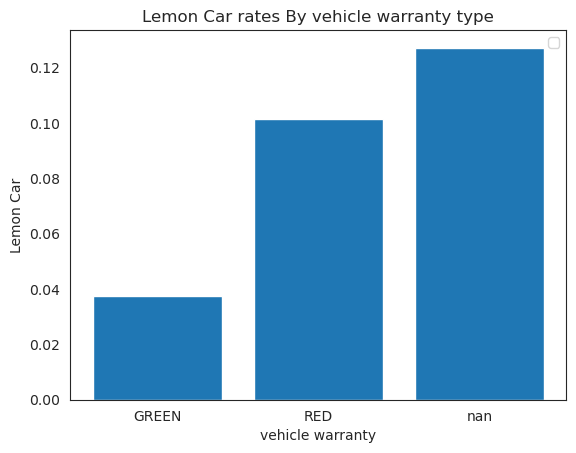

In [64]:
g = lemon.groupby(['차량보증'], dropna=False)['lemon'].mean()
x = g.index.astype(str)    
y = g.values        
plt.bar(x, y)
plt.title('Lemon Car rates By vehicle warranty type')
plt.xlabel('vehicle warranty')
plt.ylabel('Lemon Car')
plt.legend()
plt.show()


**프리미엄여부/차량보증 원-핫 인코딩**

In [65]:

lemon['프리미엄_yes'] = (lemon['프리미엄여부'] == 'YES').astype(int)
lemon['프리미엄_missing'] = (lemon['프리미엄여부'].isna()).astype(int)
lemon['차량보증_red'] = (lemon['차량보증'] == 'RED').astype(int)
lemon['차량보증_missing'] = (lemon['차량보증'].isna()).astype(int)

lemon


,lemon,구매일자,판매처,연식,차량연령,제조사,모델명,트림,세부모델명,색상,...,구매자ID,구매지우편번호,구매주,취득비용,온라인판매여부,보증금액,프리미엄_yes,프리미엄_missing,차량보증_red,차량보증_missing
ID,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,21973,33619,FL,7100.0,0,1113,0,1,0,1
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,19638,33619,FL,7600.0,0,1053,0,1,0,1
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,19638,33619,FL,4900.0,0,1389,0,1,0,1
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,19638,33619,FL,4100.0,0,630,0,1,0,1
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,19638,33619,FL,4000.0,0,1020,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,...,18111,30212,GA,4200.0,0,993,0,1,0,1
73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,...,18881,30212,GA,6200.0,0,1038,0,1,0,1
73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,...,18111,30212,GA,8200.0,0,1893,0,1,0,1


차량연령
4    17013
3    15902
5    12956
2     8482
6     8022
7     4646
1     3094
8     2220
9      646
0        2
Name: count, dtype: int64

findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font family 'malgun gothic' not found.
findfont: Font famil

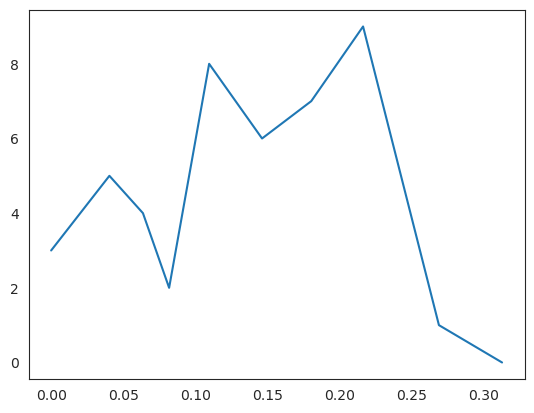

In [66]:
lemon.groupby('차량연령', dropna=False)['lemon'].agg(['mean','count'])
z = lemon.groupby('차량연령', dropna=False)['lemon'].mean()
j = lemon['차량연령'].unique()
plt.plot(z,j)

lemon['차량연령'].value_counts()


In [67]:
lemon['운행거리'].isna().sum()
lemon['운행거리_로그변환'] = np.log1p(lemon['운행거리'])

lemon['운행거리_로그변환'].head()

ID
1    11.396920
2    11.446722
3    11.209222
4    11.091605
5    11.147181
Name: 운행거리_로그변환, dtype: float64

## 랜덤포레스트로 테스트 !

In [68]:
lemon.columns

Index(['lemon', '구매일자', '판매처', '연식', '차량연령', '제조사', '모델명', '트림', '세부모델명', '색상',
       '변속기', '휠타입ID', '휠타입명', '운행거리', '생산국가', '차량크기', '미국제조사명',
       '구매당시평균상태차량가격', '구매당시평균이상상태차량가격', '구매당시평균상태소매가격', '구매당시평균이상상태소매가격',
       '현재평균상태가격', '현재평균이상상태가격', '현재평균상태소매가격', '현재평균이상상태소매가격', '프리미엄여부',
       '차량보증', '구매자ID', '구매지우편번호', '구매주', '취득비용', '온라인판매여부', '보증금액',
       '프리미엄_yes', '프리미엄_missing', '차량보증_red', '차량보증_missing', '운행거리_로그변환'],
      dtype='object')

In [75]:
cols1 = ['lemon', '프리미엄_yes', '프리미엄_missing', '차량보증_red', '차량보증_missing', '운행거리_로그변환']

lemon_rf1 = lemon[cols1]
lemon_rf1


,lemon,프리미엄_yes,프리미엄_missing,차량보증_red,차량보증_missing,운행거리_로그변환
ID,,,,,,
1,0,0,1,0,1,11.396920
2,0,0,1,0,1,11.446722
3,0,0,1,0,1,11.209222
4,0,0,1,0,1,11.091605
5,0,0,1,0,1,11.147181
...,...,...,...,...,...,...
73010,1,0,1,0,1,10.719626
73011,0,0,1,0,1,11.181082
73012,0,0,1,0,1,11.390769


In [76]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix


In [77]:


y = lemon_rf1['lemon']
x = lemon_rf1.drop(columns=['lemon'])

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [78]:

# 1) 결측치 처리(중앙값) - train 기준으로!
medians = x_train.median(numeric_only=True)

x_train2 = x_train.fillna(medians)
x_valid2 = x_valid.fillna(medians)

# 2) 모델 학습
rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(x_train2, y_train)

# 3) 평가
proba = rf.predict_proba(x_valid2)[:, 1]
pred = (proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_valid, proba))
print("F1:", f1_score(y_valid, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, pred))
print("\nReport:\n", classification_report(y_valid, pred, digits=4))

# 4) 피처 중요도
import pandas as pd
imp = pd.Series(rf.feature_importances_, index=x_train2.columns).sort_values(ascending=False)
print(imp)


ROC-AUC: 0.5138289891159938
F1: 0.15157612340710933

Confusion Matrix:
 [[10463  2339]
 [ 1456   339]]

Report:
               precision    recall  f1-score   support

           0     0.8778    0.8173    0.8465     12802
           1     0.1266    0.1889    0.1516      1795

    accuracy                         0.7400     14597
   macro avg     0.5022    0.5031    0.4990     14597
weighted avg     0.7855    0.7400    0.7610     14597

운행거리_로그변환       0.986720
차량보증_missing    0.006904
프리미엄_missing    0.005848
프리미엄_yes        0.000377
차량보증_red        0.000151
dtype: float64


In [73]:
y_valid.value_counts(normalize=True)


lemon
0    0.87703
1    0.12297
Name: proportion, dtype: float64

In [74]:
x_train2.nunique().sort_values()

프리미엄_yes            2
프리미엄_missing        2
차량보증_red            2
차량보증_missing        2
운행거리            35441
운행거리_로그변환       35441
dtype: int64